In [1]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['gender_submission.csv', 'train.csv', 'test.csv']


In [2]:
# loading data
train_data = pd.read_csv(r"../input/train.csv")
test_data = pd.read_csv(r"../input/test.csv")

In [3]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
# Feature Engineering
from sklearn.preprocessing import Imputer

def nan_padding(data, columns):
    for column in columns:
        imputer=Imputer()
        data[column]=imputer.fit_transform(data[column].values.reshape(-1,1))
    return data


nan_columns = ["Age", "SibSp", "Parch"]

train_data = nan_padding(train_data, nan_columns)
test_data = nan_padding(test_data, nan_columns)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was 

In [6]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1.0,0.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.0,0.0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0.0,0.0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0.0,0.0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0.0,0.0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3.0,1.0,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0.0,2.0,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1.0,0.0,237736,30.0708,NaN,C


In [7]:
# saving the PassengerId for evaluation
test_passenger_id=test_data["PassengerId"]

In [8]:
def drop_not_concerned(data, columns):
    return data.drop(columns, axis=1)

not_concerned_columns = ["PassengerId","Name", "Ticket", "Fare", "Cabin", "Embarked"]
train_data = drop_not_concerned(train_data, not_concerned_columns)
test_data = drop_not_concerned(test_data, not_concerned_columns)

In [9]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.000000,1.0,0.0
1,1,1,female,38.000000,1.0,0.0
2,1,3,female,26.000000,0.0,0.0
3,1,1,female,35.000000,1.0,0.0
4,0,3,male,35.000000,0.0,0.0
5,0,3,male,29.699118,0.0,0.0
6,0,1,male,54.000000,0.0,0.0
7,0,3,male,2.000000,3.0,1.0
8,1,3,female,27.000000,0.0,2.0
9,1,2,female,14.000000,1.0,0.0


In [10]:
test_data.head(10)

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0.0,0.0
1,3,female,47.0,1.0,0.0
2,2,male,62.0,0.0,0.0
3,3,male,27.0,0.0,0.0
4,3,female,22.0,1.0,1.0
5,3,male,14.0,0.0,0.0
6,3,female,30.0,0.0,0.0
7,2,male,26.0,1.0,1.0
8,3,female,18.0,0.0,0.0
9,3,male,21.0,2.0,0.0


In [11]:
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data = data.drop(column, axis=1)
    return data


dummy_columns = ["Pclass"]
train_data=dummy_data(train_data, dummy_columns)
test_data=dummy_data(test_data, dummy_columns)

In [12]:
test_data.head()

,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,male,34.5,0.0,0.0,0,0,1
1,female,47.0,1.0,0.0,0,0,1
2,male,62.0,0.0,0.0,0,1,0
3,male,27.0,0.0,0.0,0,0,1
4,female,22.0,1.0,1.0,0,0,1


In [13]:
from sklearn.preprocessing import LabelEncoder
def sex_to_int(data):
    le = LabelEncoder()
    le.fit(["male","female"])
    data["Sex"]=le.transform(data["Sex"]) 
    return data

train_data = sex_to_int(train_data)
test_data = sex_to_int(test_data)
train_data.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1.0,0.0,0,0,1
1,1,0,38.0,1.0,0.0,1,0,0
2,1,0,26.0,0.0,0.0,0,0,1
3,1,0,35.0,1.0,0.0,1,0,0
4,0,1,35.0,0.0,0.0,0,0,1


In [14]:
from sklearn.preprocessing import MinMaxScaler

def normalize_age(data):
    scaler = MinMaxScaler()
    data["Age"] = scaler.fit_transform(data["Age"].values.reshape(-1,1))
    return data
train_data = normalize_age(train_data)
test_data = normalize_age(test_data)
train_data.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,0,1,0.271174,1.0,0.0,0,0,1
1,1,0,0.472229,1.0,0.0,1,0,0
2,1,0,0.321438,0.0,0.0,0,0,1
3,1,0,0.434531,1.0,0.0,1,0,0
4,0,1,0.434531,0.0,0.0,0,0,1


In [15]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

def split_valid_test_data(data, fraction=(1 - 0.8)):
    data_y = data["Survived"]
    lb = LabelBinarizer()
    data_y = lb.fit_transform(data_y)

    data_x = data.drop(["Survived"], axis=1)

    train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=fraction)

    return train_x.values, train_y, valid_x, valid_y

train_x, train_y, valid_x, valid_y = split_valid_test_data(train_data)
print("train_x:{}".format(train_x.shape))
print("train_y:{}".format(train_y.shape))
print("train_y content:{}".format(train_y[:3]))

print("valid_x:{}".format(valid_x.shape))
print("valid_y:{}".format(valid_y.shape))

train_x:(712, 7)
train_y:(712, 1)
train_y content:[[1]
 [0]
 [1]]
valid_x:(179, 7)
valid_y:(179, 1)


In [16]:
# Building The Neural Network
from collections import namedtuple

def build_neural_network(hidden_units=10):
    tf.reset_default_graph()
    inputs = tf.placeholder(tf.float32, shape=[None, train_x.shape[1]])
    labels = tf.placeholder(tf.float32, shape=[None, 1])
    learning_rate = tf.placeholder(tf.float32)
    is_training=tf.Variable(True,dtype=tf.bool)
    
    initializer = tf.contrib.layers.xavier_initializer()
    fc = tf.layers.dense(inputs, hidden_units, activation=None,kernel_initializer=initializer)
    fc=tf.layers.batch_normalization(fc, training=is_training)
    fc=tf.nn.relu(fc)
    
    logits = tf.layers.dense(fc, 1, activation=None)
    cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)
    cost = tf.reduce_mean(cross_entropy)
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    predicted = tf.nn.sigmoid(logits)
    correct_pred = tf.equal(tf.round(predicted), labels)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Exporting the nodes 
    export_nodes = ['inputs', 'labels', 'learning_rate','is_training', 'logits',
                    'cost', 'optimizer', 'predicted', 'accuracy']
    Graph = namedtuple('Graph', export_nodes)
    local_dict = locals()
    graph = Graph(*[local_dict[each] for each in export_nodes])

    return graph

model = build_neural_network()


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [17]:
def get_batch(data_x,data_y,batch_size=32):
    batch_n=len(data_x)//batch_size
    for i in range(batch_n):
        batch_x=data_x[i*batch_size:(i+1)*batch_size]
        batch_y=data_y[i*batch_size:(i+1)*batch_size]
        
        yield batch_x,batch_y

In [18]:
epochs = 200
train_collect = 50
train_print=train_collect*2

learning_rate_value = 0.001
batch_size=16

x_collect = []
train_loss_collect = []
train_acc_collect = []
valid_loss_collect = []
valid_acc_collect = []

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    iteration=0
    for e in range(epochs):
        for batch_x,batch_y in get_batch(train_x,train_y,batch_size):
            iteration+=1
            feed = {model.inputs: train_x,
                    model.labels: train_y,
                    model.learning_rate: learning_rate_value,
                    model.is_training:True
                   }

            train_loss, _, train_acc = sess.run([model.cost, model.optimizer, model.accuracy], feed_dict=feed)
            
            if iteration % train_collect == 0:
                x_collect.append(e)
                train_loss_collect.append(train_loss)
                train_acc_collect.append(train_acc)

                if iteration % train_print==0:
                     print("Epoch: {}/{}".format(e + 1, epochs),
                      "Train Loss: {:.4f}".format(train_loss),
                      "Train Acc: {:.4f}".format(train_acc))
                        
                feed = {model.inputs: valid_x,
                        model.labels: valid_y,
                        model.is_training:False
                       }
                val_loss, val_acc = sess.run([model.cost, model.accuracy], feed_dict=feed)
                valid_loss_collect.append(val_loss)
                valid_acc_collect.append(val_acc)
                
                if iteration % train_print==0:
                    print("Epoch: {}/{}".format(e + 1, epochs),
                      "Validation Loss: {:.4f}".format(val_loss),
                      "Validation Acc: {:.4f}".format(val_acc))
                

    saver.save(sess, "./titanic.ckpt")

Epoch: 3/200 Train Loss: 0.5470 Train Acc: 0.7711
Epoch: 3/200 Validation Loss: 0.5959 Validation Acc: 0.6872
Epoch: 5/200 Train Loss: 0.4438 Train Acc: 0.8146
Epoch: 5/200 Validation Loss: 0.5161 Validation Acc: 0.7821
Epoch: 7/200 Train Loss: 0.4134 Train Acc: 0.8174
Epoch: 7/200 Validation Loss: 0.4738 Validation Acc: 0.7877
Epoch: 10/200 Train Loss: 0.4027 Train Acc: 0.8244
Epoch: 10/200 Validation Loss: 0.4611 Validation Acc: 0.7821
Epoch: 12/200 Train Loss: 0.3968 Train Acc: 0.8244
Epoch: 12/200 Validation Loss: 0.4640 Validation Acc: 0.7877
Epoch: 14/200 Train Loss: 0.3937 Train Acc: 0.8258
Epoch: 14/200 Validation Loss: 0.4649 Validation Acc: 0.7933
Epoch: 16/200 Train Loss: 0.3913 Train Acc: 0.8301
Epoch: 16/200 Validation Loss: 0.4669 Validation Acc: 0.7933
Epoch: 19/200 Train Loss: 0.3901 Train Acc: 0.8315
Epoch: 19/200 Validation Loss: 0.4666 Validation Acc: 0.7989
Epoch: 21/200 Train Loss: 0.3892 Train Acc: 0.8343
Epoch: 21/200 Validation Loss: 0.4634 Validation Acc: 0.798

Epoch: 169/200 Train Loss: 0.3693 Train Acc: 0.8413
Epoch: 169/200 Validation Loss: 0.4816 Validation Acc: 0.8045
Epoch: 171/200 Train Loss: 0.3687 Train Acc: 0.8427
Epoch: 171/200 Validation Loss: 0.4896 Validation Acc: 0.8156
Epoch: 173/200 Train Loss: 0.3684 Train Acc: 0.8413
Epoch: 173/200 Validation Loss: 0.4886 Validation Acc: 0.7989
Epoch: 175/200 Train Loss: 0.3676 Train Acc: 0.8441
Epoch: 175/200 Validation Loss: 0.5111 Validation Acc: 0.8101
Epoch: 178/200 Train Loss: 0.3666 Train Acc: 0.8455
Epoch: 178/200 Validation Loss: 0.5168 Validation Acc: 0.8045
Epoch: 180/200 Train Loss: 0.3664 Train Acc: 0.8455
Epoch: 180/200 Validation Loss: 0.5134 Validation Acc: 0.8045
Epoch: 182/200 Train Loss: 0.3663 Train Acc: 0.8469
Epoch: 182/200 Validation Loss: 0.5018 Validation Acc: 0.8045
Epoch: 185/200 Train Loss: 0.3662 Train Acc: 0.8469
Epoch: 185/200 Validation Loss: 0.5051 Validation Acc: 0.8045
Epoch: 187/200 Train Loss: 0.3661 Train Acc: 0.8497
Epoch: 187/200 Validation Loss: 0.50

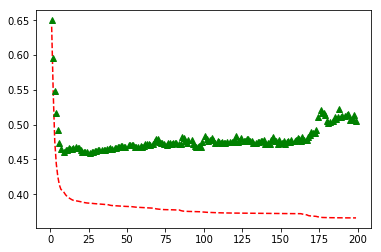

In [19]:
plt.plot(x_collect, train_loss_collect, "r--")
plt.plot(x_collect, valid_loss_collect, "g^")
plt.show()

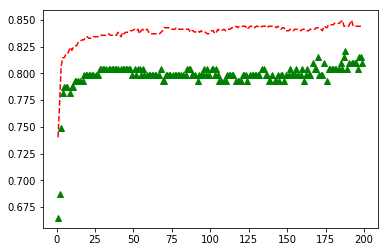

In [20]:
plt.plot(x_collect, train_acc_collect, "r--")
plt.plot(x_collect, valid_acc_collect, "g^")
plt.show()

In [21]:
model=build_neural_network()
restorer=tf.train.Saver()
with tf.Session() as sess:
    restorer.restore(sess,"./titanic.ckpt")
    feed={
        model.inputs:test_data,
        model.is_training:False
    }
    test_predict=sess.run(model.predicted,feed_dict=feed)
    
test_predict[:10]

array([[0.04409385],
       [0.64567614],
       [0.04676524],
       [0.12353387],
       [0.26226565],
       [0.2037983 ],
       [0.5954964 ],
       [0.02614376],
       [0.68522674],
       [0.23017663]], dtype=float32)

In [22]:
from sklearn.preprocessing import Binarizer
binarizer=Binarizer(0.5)
test_predict_result=binarizer.fit_transform(test_predict)
test_predict_result=test_predict_result.astype(np.int32)
test_predict_result[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0]], dtype=int32)

In [23]:
passenger_id=test_passenger_id.copy()
evaluation=passenger_id.to_frame()
evaluation["Survived"]=test_predict_result
evaluation[:10]

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [24]:
evaluation.to_csv("evaluation_submission.csv",index=False)